# MOVIE REVIEWS CLASSIFICATION USING RNN(LSTM)

~~~~~
This example shows:

Movie Review classification into Positive(1) OR Negative Review(0) Using RNN's LSTM Network using Keras API call.

IMDB Data set contains vector of numbers(words converted into numbers) and output responses(list of 1 or 0 reviews classification)


~~~~~

### Importing KERAS 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Sequence to attain Padding
from keras.preprocessing import sequence

# Importing RNN's LSTM
from keras.layers import LSTM, Dense

from keras.layers import Embedding

# Applying Sequential algorithm to model
from keras.models import Sequential

# DataSet = IMDB
from keras.datasets import imdb

# For one-hot-encoding
from keras.utils import np_utils

### Defining Parameters

In [4]:
num_words = 20000
batch_size = 32
epochs = 2

### Training and Testing units

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [6]:
x_train.shape

(25000,)

In [7]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [8]:
len(y_train)

25000

In [9]:
# X contains a set of 25,000 Reviews. Each word in a sentence is converted into a number using 'some' technique
x_train.shape

(25000,)

In [10]:
review_1 = len(x_train[0])
review_2 = len(x_train[1])
review_3 = len(x_train[2])
...
review_25000 = len(x_train[24999])

print("Word Count in review 1     = ", review_1)

Word Count in review 1     =  218


In [11]:
#  Padding(Truncating) each review to a particular length(80), longer reviews will be cut short, 
## and shorter sentences will be added with zeros

x_train = sequence.pad_sequences(x_train, maxlen=80)
x_test = sequence.pad_sequences(x_test, maxlen=80)

#### One Hot Encoding for outputs

In [12]:
# One-Hot-Encoding for output

y_train_oneHotEnc = np_utils.to_categorical(y_train, num_classes=2)
y_test_oneHotEnc = np_utils.to_categorical(y_test, num_classes=2)

In [13]:
y_train_oneHotEnc

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [14]:
len(y_train_oneHotEnc)

25000

### MODEL

In [15]:
model = Sequential()

In [16]:
# Model Architecture

model.add(Embedding(num_words, 128))
model.add(LSTM(64))
model.add(Dense(2, activation="sigmoid"))

In [17]:
# Compiling Model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Model Fitting
mode_fit = model.fit(x_train, y_train_oneHotEnc, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test_oneHotEnc))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 219s - loss: 0.4258 - acc: 0.7993 - val_loss: 0.3490 - val_acc: 0.8429
Epoch 2/2
25000/25000 [==============================] - 239s - loss: 0.2424 - acc: 0.9017 - val_loss: 0.3818 - val_acc: 0.8423


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 2,609,538
Trainable params: 2,609,538
Non-trainable params: 0
_________________________________________________________________


### Predictions

In [25]:
y_hat = model.predict_classes(x_test)

24992/25000 [============================>.] - ETA: 0s

In [26]:
y_hat

array([1, 0, 1, ..., 1, 0, 1])

### Comparison

In [27]:
pd.crosstab(y_hat, y_test)

col_0,0,1
row_0,,
0,10908,2350
1,1592,10150


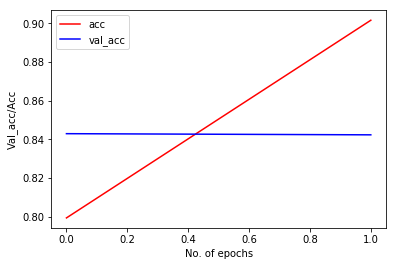

In [28]:
plt.plot(mode_fit.epoch, mode_fit.history['acc'],'r', label = 'acc')
plt.plot(mode_fit.epoch, mode_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

### Accuracy

In [30]:
train_acc = mode_fit.history['acc'][epochs-1]
train_acc*100

90.168000000000006